### Fit S21 traces for R4_F1_4p95

In [1]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [2]:
resonator_name = "R4_F1_4p95"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [3]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 25
    # data points      = 480
    # variables        = 4
    chi-square         = 0.04011071
    reduced chi-square = 8.4266e-05
    Akaike info crit   = -4499.15110
    Bayesian info crit = -4482.45595
    R-squared          = np.complex128(-126248610458.87256+10907474101772.98j)
[[Variables]]
    fr:     4.9531e+09 +/- 35.3409395 (0.00%) (init = 4.953094e+09)
    Ql:     173383.284 +/- 428.990047 (0.25%) (init = 182300.4)
    absQc:  226456.965 +/- 485.837371 (0.21%) (init = 237951.9)
    phi:    0.85572413 +/- 0.00214538 (0.25%) (init = 0.8556118)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     348162.773 +/- 1435.62371 (0.41%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8671
    C(fr, phi)   = -0.8671


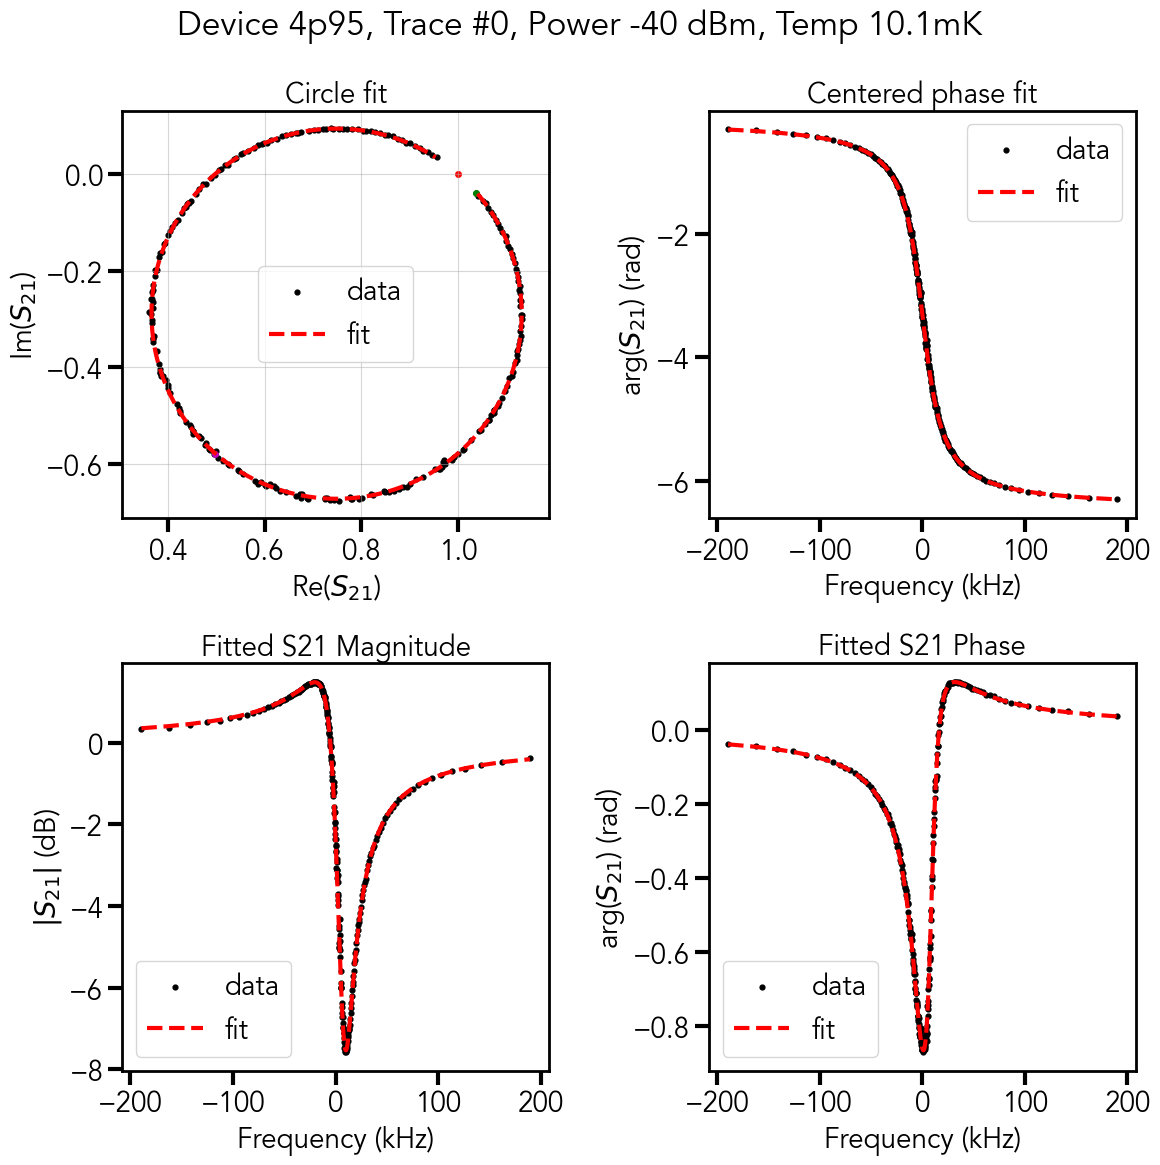

In [4]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [5]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [6]:
save_traces(traces, output_file)